In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from glob import glob

glob('Data/*')[-1]

'Data\\방한 외국인 방문 목적.xlsx'

In [9]:
raw = pd.read_excel(glob('Data/*')[-1])
raw

,BASE:전체,Unnamed: 1,사례수,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
0,▩ 전 체 ▩,NaN,(16469),78.414741,18.129459,2.955334,0.359288,0.141177
1,▩ 월 별 ▩,1 월,(1019),75.123129,21.825447,2.438022,0.362776,0.250626
2,NaN,2 월,(1130),82.497924,13.597651,2.288398,0.384510,1.231516
3,NaN,3 월,(1481),78.538192,17.698785,3.016709,0.557193,0.189121
4,NaN,4 월,(1410),72.258462,24.835573,2.672079,0.120621,0.113265
5,NaN,5 월,(1301),78.417052,18.870670,2.392843,0.250433,0.069002
6,NaN,6 월,(1366),80.643004,16.213903,3.025096,0.117998,0.000000
7,NaN,7 월,(1352),80.652528,14.811237,3.943271,0.575962,0.017003
8,NaN,8 월,(1496),78.389003,17.581221,3.326884,0.702893,0.000000
9,NaN,9 월,(1375),79.110141,17.708380,2.851929,0.329550,0.000000


In [10]:
raw = raw.drop('BASE:전체',axis=1)

In [11]:
raw = raw.set_index('Unnamed: 1')

In [12]:
raw

,사례수,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
Unnamed: 1,,,,,,
NaN,(16469),78.414741,18.129459,2.955334,0.359288,0.141177
1 월,(1019),75.123129,21.825447,2.438022,0.362776,0.250626
2 월,(1130),82.497924,13.597651,2.288398,0.384510,1.231516
3 월,(1481),78.538192,17.698785,3.016709,0.557193,0.189121
4 월,(1410),72.258462,24.835573,2.672079,0.120621,0.113265
5 월,(1301),78.417052,18.870670,2.392843,0.250433,0.069002
6 월,(1366),80.643004,16.213903,3.025096,0.117998,0.000000
7 월,(1352),80.652528,14.811237,3.943271,0.575962,0.017003
8 월,(1496),78.389003,17.581221,3.326884,0.702893,0.000000


In [14]:
df_m = raw.iloc[1:13]
df_c = raw.iloc[13:34]
df_s = raw.iloc[34:36]
df_a = raw.iloc[36:]

In [11]:
round(3358 * 0.79239886, 3)

2660.875

In [12]:
3358 * 0.18150111

609.48072738

In [13]:
3358 * (2.096342 *0.01)

70.39516436

In [14]:
3358 * (0.412150 * 0.01)

13.839997

In [15]:
3358 * (0.101512* 0.01)

3.40877296

In [16]:
round(2660.8753718800003,3) + round(609.48072738,3) + round(13.839997,3) + round(3.40877296,3) + round(70.39516436,3)

3358.0

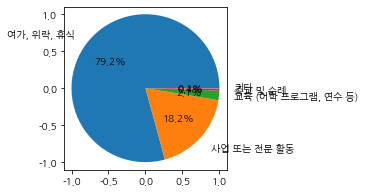

In [17]:
import koreanize_matplotlib
ratio = [round(2660.8753718800003,3), round(609.48072738,3),round(70.39516436,3), round(13.839997,3), round(3.40877296,3)]
labels = ['여가, 위락, 휴식','사업 또는 전문 활동','교육 (어학 프로그램, 연수 등)','종교 및 순례','기타']

plt.figure(figsize=(12,3))
plt.pie(ratio, labels=labels, autopct='%.1f%%', labeldistance=1.2, frame=True)
plt.show();

In [18]:
df_c

,사례수,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
Unnamed: 1,,,,,,
일 본,(3358),79.239886,18.150111,2.096342,0.412150,0.101512
중 국,(5447),83.700415,12.547092,3.442824,0.309669,0.000000
홍 콩,(789),89.737107,9.039633,1.223260,0.000000,0.000000
싱 가 포 르,(251),76.777875,20.260442,2.770957,0.124401,0.066324
대 만,(1286),89.474671,8.672733,1.644248,0.208348,0.000000
태 국,(588),89.496679,6.980424,3.133684,0.389213,0.000000
말 레 이 시 아,(415),87.798604,8.165643,3.837090,0.198663,0.000000
호 주,(160),67.224848,28.217279,4.147683,0.000000,0.410190
미 국,(1046),58.974609,36.515968,3.253256,0.517717,0.738450


In [19]:
df_c.index = df_c.index.str.replace(' ','')
df_c.index = df_c.index.rename('국가')

In [20]:
df_c['사례수'] = df_c['사례수'].str.replace('(','')
df_c['사례수'] = df_c['사례수'].str.replace(')','')

C:\temp\ipykernel_7800\3493681520.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_c['사례수'] = df_c['사례수'].str.replace('(','')
C:\temp\ipykernel_7800\3493681520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['사례수'] = df_c['사례수'].str.replace('(','')
C:\temp\ipykernel_7800\3493681520.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_c['사례수'] = df_c['사례수'].str.replace(')','')
C:\temp\ipykernel_7800\3493681520.py:2: Sett

In [21]:
df_c['사례수'] = df_c['사례수'].astype(int)

C:\temp\ipykernel_7800\3228101307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['사례수'] = df_c['사례수'].astype(int)


In [22]:
df_new = pd.DataFrame(index=df_c.index ,columns=['여가, 위락, 휴식','사업 또는 전문 활동','교육 (어학 프로그램, 연수 등)','종교 및 순례','기타'])
df_new

,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
국가,,,,,
일본,NaN,NaN,NaN,NaN,NaN
중국,NaN,NaN,NaN,NaN,NaN
홍콩,NaN,NaN,NaN,NaN,NaN
싱가포르,NaN,NaN,NaN,NaN,NaN
대만,NaN,NaN,NaN,NaN,NaN
태국,NaN,NaN,NaN,NaN,NaN
말레이시아,NaN,NaN,NaN,NaN,NaN
호주,NaN,NaN,NaN,NaN,NaN
미국,NaN,NaN,NaN,NaN,NaN


In [23]:
df_new['여가, 위락, 휴식'] = round(df_c['사례수'] * df_c['여가, 위락, 휴식'] * 0.01, 3)
df_new['사업 또는 전문 활동'] = round(df_c['사례수'] * df_c['사업 또는 전문 활동'] * 0.01, 3)
df_new['교육 (어학 프로그램, 연수 등)'] = round(df_c['사례수'] * df_c['교육 (어학 프로그램, 연수 등)'] * 0.01, 3)
df_new['종교 및 순례'] = round(df_c['사례수'] * df_c['종교 및 순례'] * 0.01, 3)
df_new['기타'] =  round(df_c['사례수'] * df_c['기타'] * 0.01, 3)
df_new

,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
국가,,,,,
일본,2660.875,609.481,70.395,13.840,3.409
중국,4559.162,683.440,187.531,16.868,0.000
홍콩,708.026,71.323,9.652,0.000,0.000
싱가포르,192.712,50.854,6.955,0.312,0.166
대만,1150.644,111.531,21.145,2.679,0.000
태국,526.240,41.045,18.426,2.289,0.000
말레이시아,364.364,33.887,15.924,0.824,0.000
호주,107.560,45.148,6.636,0.000,0.656
미국,616.874,381.957,34.029,5.415,7.724


In [39]:
new_data = {'여가, 위락, 휴식': round(df_new['여가, 위락, 휴식'].sum(),3), '사업 또는 전문 활동':round(df_new['사업 또는 전문 활동'].sum(),3),
           '교육 (어학 프로그램, 연수 등)': round(df_new['교육 (어학 프로그램, 연수 등)'].sum(),3),'종교 및 순례':round(df_new['종교 및 순례'].sum(),3),'기타':round(df_new['기타'].sum(),3)}


In [50]:
new_data = pd.DataFrame(new_data, index=['전체'])
new_data

,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
전체,12913.02,2984.952,486.621,59.163,23.243


In [54]:
df_new = df_new.append(new_data)

C:\temp\ipykernel_7800\2195617454.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append(new_data)


In [24]:
# list_new = []
# for i in range(len(df_c.index)):
#     for x in range(len(df_c.columns)-1):
#         list_new.append(round(df_c.iloc[i][0] * df_c.iloc[i][x+1] * 0.01, 3))
#     df_new[] = list

# list_new

In [25]:
# a = 0
# for i in range(len(df_new.index)):
#     for x in range(len(df_new.columns)):
#         df_new.iloc[i][x] = list_new[x]

In [26]:
df_c.index

Index(['일본', '중국', '홍콩', '싱가포르', '대만', '태국', '말레이시아', '호주', '미국', '캐나다', '영국',
       '독일', '프랑스', '러시아', '중동', '인도', '필리핀', '인도네시아', '베트남', '몽골', '기타'],
      dtype='object', name='국가')

In [27]:
# df_c.iloc[0][1]
round(df_c.iloc[2][0] * df_c.iloc[0][1] * 0.01, 3)
# df_c

625.203

In [5]:
glob('Data/*')[-1]

'Data\\방한 외국인 방문 목적.xlsx'

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob

# 파일 불러오기
raw = pd.read_excel(glob('Data/*')[-1])

# 필요한 데이터 추출
raw = raw.drop('BASE:전체',axis=1)
raw = raw.set_index('Unnamed: 1')
df_m = raw.iloc[1:13]
df_c = raw.iloc[13:34]
df_s = raw.iloc[34:36]
df_a = raw.iloc[36:]

# 데이터 전처리
df_c.index = df_c.index.str.replace(' ','')
df_c.index = df_c.index.rename('국가')
df_c['사례수'] = df_c['사례수'].str.replace('(','')
df_c['사례수'] = df_c['사례수'].str.replace(')','')
df_c['사례수'] = df_c['사례수'].astype(int)
df_new = pd.DataFrame(index=df_c.index ,columns=['여가, 위락, 휴식','사업 또는 전문 활동','교육 (어학 프로그램, 연수 등)','종교 및 순례','기타'])
df_new['여가, 위락, 휴식'] = round(df_c['사례수'] * df_c['여가, 위락, 휴식'] * 0.01, 3)
df_new['사업 또는 전문 활동'] = round(df_c['사례수'] * df_c['사업 또는 전문 활동'] * 0.01, 3)
df_new['교육 (어학 프로그램, 연수 등)'] = round(df_c['사례수'] * df_c['교육 (어학 프로그램, 연수 등)'] * 0.01, 3)
df_new['종교 및 순례'] = round(df_c['사례수'] * df_c['종교 및 순례'] * 0.01, 3)
df_new['기타'] =  round(df_c['사례수'] * df_c['기타'] * 0.01, 3)

# 전체 데이터 추가
new_data = {'여가, 위락, 휴식': round(df_new['여가, 위락, 휴식'].sum(),3), '사업 또는 전문 활동':round(df_new['사업 또는 전문 활동'].sum(),3),
           '교육 (어학 프로그램, 연수 등)': round(df_new['교육 (어학 프로그램, 연수 등)'].sum(),3),'종교 및 순례':round(df_new['종교 및 순례'].sum(),3),'기타':round(df_new['기타'].sum(),3)}
new_data = pd.DataFrame(new_data, index=['전체'])
df_new_all = df_new.append(new_data)

C:\temp\ipykernel_30564\203373313.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_c['사례수'] = df_c['사례수'].str.replace('(','')
C:\temp\ipykernel_30564\203373313.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['사례수'] = df_c['사례수'].str.replace('(','')
C:\temp\ipykernel_30564\203373313.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_c['사례수'] = df_c['사례수'].str.replace(')','')
C:\temp\ipykernel_30564\203373313.py:22: 

In [140]:
df_new_all

,"여가, 위락, 휴식",사업 또는 전문 활동,"교육 (어학 프로그램, 연수 등)",종교 및 순례,기타
일본,2660.875,609.481,70.395,13.840,3.409
중국,4559.162,683.440,187.531,16.868,0.000
홍콩,708.026,71.323,9.652,0.000,0.000
싱가포르,192.712,50.854,6.955,0.312,0.166
대만,1150.644,111.531,21.145,2.679,0.000
태국,526.240,41.045,18.426,2.289,0.000
말레이시아,364.364,33.887,15.924,0.824,0.000
호주,107.560,45.148,6.636,0.000,0.656
미국,616.874,381.957,34.029,5.415,7.724
캐나다,151.959,45.360,4.694,1.069,1.919


In [129]:
# df_new_all.to_csv('trip_purpose.csv' , index=True)

In [130]:
# df = pd.read_csv('trip_purpose.csv')

In [131]:
# df = df.rename(columns={'Unnamed: 0':'나라'})

In [141]:
def pie_chart(country):
    labels = ['여가, 위락, 휴식','사업 또는 전문 활동','교육 (어학 프로그램, 연수 등)','종교 및 순례','기타']
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.rcParams['font.size'] = 15
    plt.figure()
    plt.title(f'{country} 여행객들의 방문 목적 백분율')
    plt.pie(df_new_all.loc[f'{country}'], labels=labels, autopct='%.1f%%', labeldistance=1.2)
    plt.show();

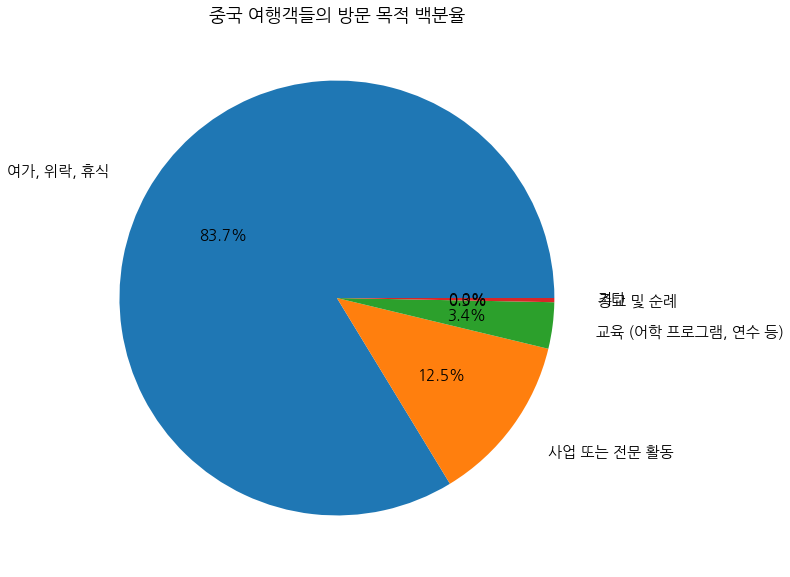

In [142]:
pie_chart('중국')

In [82]:
def type_of_purpose(w):
    a = df_new.columns[w]
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.rcParams['font.size'] = 15
    plt.figure()
    plt.title(f'나라별 {a} 목적 백분율')
    plt.pie(df_new.iloc[:, w], labels=df_new.index, autopct='%.1f%%', labeldistance=1.2)
    plt.show();

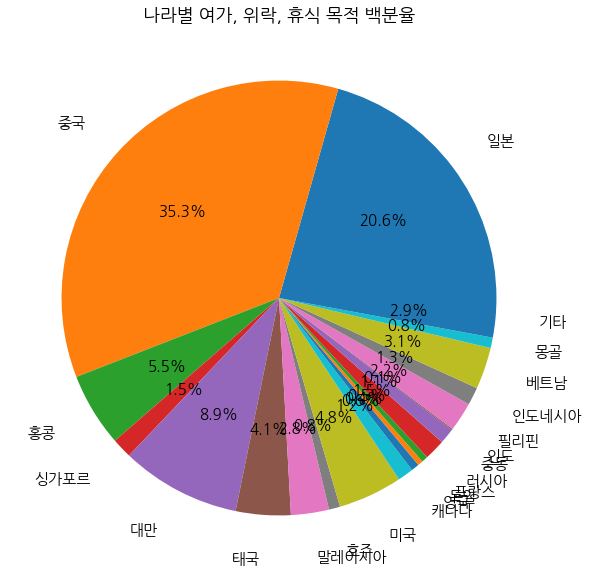

In [92]:
# 0 = '여가, 위락, 휴식', 1 = '사업 또는 전문 활동' , 2 = '교육 (어학 프로그램, 연수 등)', 3 = '종교 및 순례', 4 = '기타'
type_of_purpose(0)